<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">


# Lab Keras

Neste exercício você vai empregar modelos Sequenciais do `Keras` para resolver o problema de classificação da base de dados `penguins`. Siga os passos e, a seguir, responda o questionário no Moodle. Vamos buscar prever com modelos de redes profundas a ilha de um pinguim com base nos demais atributos. 

Acesse [aqui](https://keras.io/) a documentação do `Keras`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Dados

In [2]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Dropna

Verifique e exclua os dados ausentes.

In [3]:
df.shape

(344, 7)

In [4]:
# seu código
df = df.dropna().reset_index(drop=True)

# Transformações

O `Keras` possui várias funções de transformação como HotEncode e Normalização, mas aqui vamos seguir empregando as funções que você já conhece do `scikit-learn`.

# Hot Encode

Faça o hot enconde de `species` e `island` empregando:

```
from sklearn.preprocessing import OneHotEncoder
```

In [5]:
# seu código
from sklearn.preprocessing import OneHotEncoder

df2 = df.drop(columns=['species','island'])

hot_encode = OneHotEncoder(handle_unknown='ignore') 
hot_encode = hot_encode.fit(df[['species','island']])
transformed = hot_encode.transform(df[['species','island']]).toarray()

transformed_df = pd.DataFrame(transformed, columns=hot_encode.get_feature_names_out())
display(transformed_df.head())

df2 = pd.concat([df2, transformed_df],axis=1) 
df2.head()


,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,Male,1.0,0.0,0.0,0.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,Female,1.0,0.0,0.0,0.0,0.0,1.0
2,40.3,18.0,195.0,3250.0,Female,1.0,0.0,0.0,0.0,0.0,1.0
3,36.7,19.3,193.0,3450.0,Female,1.0,0.0,0.0,0.0,0.0,1.0
4,39.3,20.6,190.0,3650.0,Male,1.0,0.0,0.0,0.0,0.0,1.0


# Label Encode

Faça o Label Encode de `sex` empregando

```
from sklearn.preprocessing import LabelEncoder
```

Ele é semelhante ao `OneHotEncode`. Consulte a documentação se precisar.  

In [6]:
# seu código
from sklearn.preprocessing import LabelEncoder
LabelEncode = LabelEncoder()
LabelEncode = LabelEncode.fit(df2['sex'])
labels = LabelEncode.transform(df2['sex'])

df_labels = pd.DataFrame(labels, columns=['sex'])
print(df.shape)
df2['sex'] = df_labels
df2.head()

(333, 7)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,1,1.0,0.0,0.0,0.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,0,1.0,0.0,0.0,0.0,0.0,1.0
2,40.3,18.0,195.0,3250.0,0,1.0,0.0,0.0,0.0,0.0,1.0
3,36.7,19.3,193.0,3450.0,0,1.0,0.0,0.0,0.0,0.0,1.0
4,39.3,20.6,190.0,3650.0,1,1.0,0.0,0.0,0.0,0.0,1.0


In [7]:
df2.sum()

bill_length_mm         14649.6
bill_depth_mm           5715.9
flipper_length_mm      66922.0
body_mass_g          1400950.0
sex                      168.0
species_Adelie           146.0
species_Chinstrap         68.0
species_Gentoo           119.0
island_Biscoe            163.0
island_Dream             123.0
island_Torgersen          47.0
dtype: float64

# Normalização

Empregue:

```
from sklearn.preprocessing import StandardScaler
```

Para fazer a normalização dos dados:

```
['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'species_Adelie',
       'species_Chinstrap', 'sex']
```

**Note**, fizemos a normalização eliminando uma das espécies. **Por que?**

Não empregaremos `body_mass_g` nem `island` que são atributos objetivo das seções seguintes. O nome dos atributos ainda pode diferir de acordo com as transformações anteriores que você fez.

In [8]:
# seu código
from sklearn.preprocessing import StandardScaler

# Entradas e Saídas
X = df2[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g' , 'species_Adelie',
       'species_Chinstrap','sex']]

columns = X.columns

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [9]:
pd.DataFrame(X, columns = columns).head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,sex
0,-0.896042,0.780732,-1.426752,-0.568475,1.131734,-0.506561,0.991031
1,-0.822788,0.119584,-1.069474,-0.506286,1.131734,-0.506561,-1.009050
2,-0.676280,0.424729,-0.426373,-1.190361,1.131734,-0.506561,-1.009050
3,-1.335566,1.085877,-0.569284,-0.941606,1.131734,-0.506561,-1.009050
4,-0.859415,1.747026,-0.783651,-0.692852,1.131734,-0.506561,0.991031


In [10]:
print(X.sum())

4.547473508864641e-13


# Classificação

Aqui vamos empregar redes neurais profundas para fazer a classificação da Ilha dos Penguins com base nos demais dados.

## Separando os dados de Treinamento e Teste

Empregue `random_state=1`, e 0.3 de dados de teste estratificados por y.

In [11]:
# seu código

from sklearn.model_selection import train_test_split

y = df2[['island_Biscoe','island_Dream',	'island_Torgersen']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

df['island'].unique()


array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [12]:
X_train.shape

(233, 7)

In [13]:
input_dim = X_train.shape[1] # nr de features

In [14]:
y_train.shape

(233, 3)

In [15]:
output_dim = y_train.shape[1] # nr de classes

# Configuração e Treinamento da Rede Deep Learning

Empregue o template abaixo para criar 3 diferentes modelos de redes profundas. Faça mais de uma execução (3 ou mais) até os resultados estarem consistentes (o melhor modelo persistindo na maior parte das vezes). Descarte resultados abaixo de 50%.

* Modelo 1
> Somente com as camadas de entrada e saída. Empregue as funções `relu` e `softmax` respectivamente para as camadas de entrada e saída.

* Modelo 2
> Empregue as funções `relu` e `softmax` respectivamente para as camadas de entrada e saída. Empregue ainda 2 camadas ocultas de 64 elementos e função `relu`. 

* Modelo 3
> **Pesquise para implementar!** O que é e como criar uma camada de `Dropout`? Empregue o modelo anterior adionando uma camada de `Dropout` de 10% após cada camada oculta.

In [16]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential, layers
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report  

In [17]:
print("TF Version: ", tf.__version__)
print("GPU available: ", tf.config.list_physical_devices('GPU')) # havendo disponibilidade o modelo executa empregando GPU

TF Version:  2.9.2
GPU available:  []


In [18]:
#@markdown `plot_loss_acc(history,more_title='')`
def plot_loss_acc(history,more_title=''):
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(8,5))
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss' + ' ' + more_title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.figure(figsize=(8,5))
    plt.plot(epochs, acc, 'y', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy' + ' ' + more_title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    print(more_title + 'Accuracy Train: {:.2f} %, Accuracy Test: {:.2f} %'.format(acc[len(acc)-1] *100, val_acc[len(val_acc)-1]*100))

    return loss, val_loss, acc, val_acc

## Modelo 1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 3)                 24        
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.5216882228851318

Test accuracy: 0.6100000143051147


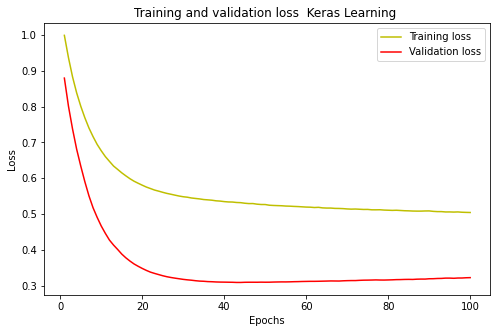

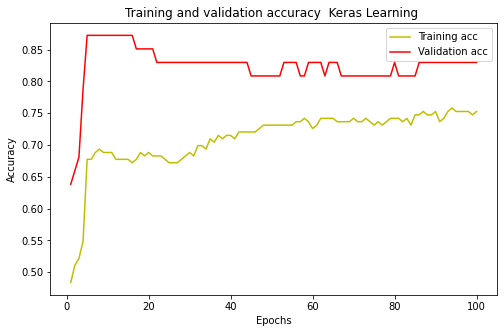

 Keras Learning Accuracy Train: 75.27 %, Accuracy Test: 82.98 %


In [19]:
# seu código 

# Neural net config
model = Sequential([layers.Dense(X_train.shape[1], activation='relu', input_shape=[X_train.shape[1],])]) 
model.add(layers.Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=8, verbose=0)

# Show results
model.summary()

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print()
print('Test accuracy:', score[1])

loss, val_loss, acc, val_acc = plot_loss_acc(history,' Keras Learning ')

# save model
model1 = model

# Modelo 2


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 64)                512       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4,923
Trainable params: 4,923
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.5913651585578918

Test accuracy: 0.6700000166893005


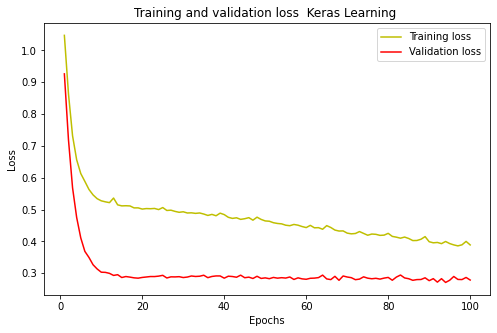

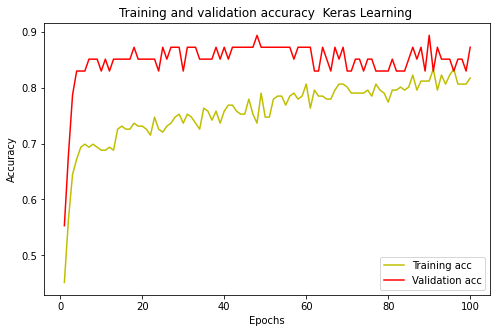

 Keras Learning Accuracy Train: 81.72 %, Accuracy Test: 87.23 %


In [20]:
# seu código

model = Sequential([layers.Dense(X_train.shape[1], activation='relu', input_shape=[X_train.shape[1],])]) 

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(y_train.shape[1], activation='softmax'))

# Train config
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=8, verbose=0)

model.summary()

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print()
print('Test accuracy:', score[1])

loss, val_loss, acc, val_acc = plot_loss_acc(history,' Keras Learning ')

model2 = model

# Modelo 3

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 7)                 56        
                                                                 
 dense_7 (Dense)             (None, 64)                512       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4,923
Trainable params: 4,923
Non-traina

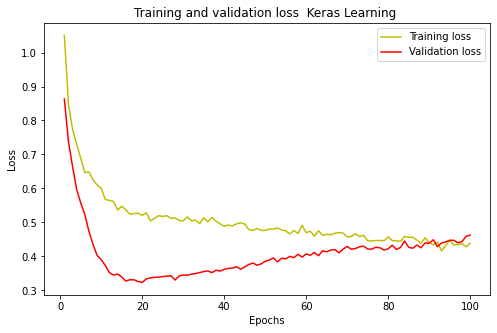

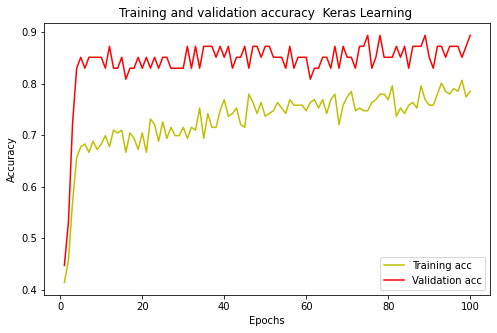

 Keras Learning Accuracy Train: 78.49 %, Accuracy Test: 89.36 %


In [21]:
# seu código
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

# Net config 
model = Sequential([layers.Dense(X_train.shape[1], activation='relu', input_shape=[X_train.shape[1],])]) 

p_dropout = 0.1 # probabilidade de Dropout

model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(p_dropout, input_shape=[X_train.shape[1],]))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(p_dropout, input_shape=[X_train.shape[1],]))

model.add(layers.Dense(y_train.shape[1], activation='softmax'))

# Train config
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=8, verbose=0)

model.summary()

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print()
print('Test accuracy:', score[1])

loss, val_loss, acc, val_acc = plot_loss_acc(history,' Keras Learning ')

model3 = model

### Summarize all results

In [22]:
print( 'Score Accuracy Test Model 1: ' , model1.evaluate(X_test, y_test, verbose=0)[1] )
print( 'Score Accuracy Test Model 2: ' , model2.evaluate(X_test, y_test, verbose=0)[1] )
print( 'Score Accuracy Test Model 3: ' , model3.evaluate(X_test, y_test, verbose=0)[1] )

Score Accuracy Test Model 1:  0.6100000143051147
Score Accuracy Test Model 2:  0.6700000166893005
Score Accuracy Test Model 3:  0.6800000071525574


# Predição `X_test`

Empregue o melhor dos 3 modelos e construa a matriz de confusão (`confusion_matrix`) sobre o conjunto de teste.

In [23]:
# seu código
from sklearn.metrics import confusion_matrix
# Predict
y_pred = np.argmax(model3.predict(X_test), axis=-1)

print(confusion_matrix(np.argmax(y_test.to_numpy(), axis=-1),y_pred))
print(classification_report(np.argmax(y_test.to_numpy(), axis=-1),y_pred))


4/4 [==============================] - 0s 3ms/step
[[40  7  2]
 [ 8 26  3]
 [ 5  7  2]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        49
           1       0.65      0.70      0.68        37
           2       0.29      0.14      0.19        14

    accuracy                           0.68       100
   macro avg       0.56      0.55      0.55       100
weighted avg       0.65      0.68      0.66       100



# Predição de um novo caso

Empregue o melhor dos 3 modelos. Faça a predição de um pinguim modelo da espécie `Gentoo` do sexo masculino. Os demais valores são os valores médios da coleção toda. Faça a predição da ilha de origem do pinguim modelo.

In [24]:
# seu código

df_new = pd.DataFrame()

df_new['bill_length_mm'] = [df['bill_length_mm'].mean()]
df_new['bill_depth_mm'] = df['bill_depth_mm'].mean()
df_new['flipper_length_mm'] = df['flipper_length_mm'].mean()
df_new['body_mass_g'] = df['body_mass_g'].mean()
df_new['species_Adelie'] = 0
df_new['species_Chinstrap'] = 0 
df_new['species_Gentoo'] = 1 
df_new['sex'] = 1

df_new.head()
df_new.sum().sum()


4471.181681681682

In [25]:
from sklearn.preprocessing import StandardScaler

# seu código



In [26]:
# seu código